# Estudo da equação de Colebroke


In [133]:
import numpy as np
import pandas as pd
import math
import sympy as sp
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [134]:
sp. init_printing(use_latex='png', scale=1.0, order='grlex',
                    forecolor='Black', backcolor='White')
x = sp.Symbol('x')

In [135]:
# rugosidade da tubulação
E = 1.22e-5
# Diâmetro interno da tubulação
D = 0.50
# n.º de reynolds para o fluido em questão
re = 1.7e+5
# (função) fator de atrito
start = 1
end = 100
spaces = 100

##### Erro relativo

In [136]:
def erro_relativo(m, n):
    erro = math.sqrt(math.pow(m - n, 2) / math.sqrt(math.pow(m, 2))) * 100
    return erro

##### Equação de Colebroke:

In [137]:
function = - 2 * sp.log((E / (D * 3.7) + (2.51 * x / re)))
function

##### Derivada da equação de Colebroke

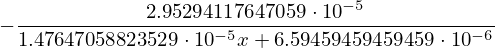

In [138]:
derivada = function.diff()
derivada

In [139]:
x_estimado = []
f_estimado = []
erro_estimado = []

In [144]:
def newton_raphson(tol):
    erro = 1
    i = 0
    c = 4.8
    while tol < erro:
        y = c - function.subs({x:c}) / derivada.subs({x:c})
        i = i + 1
        erro = erro_relativo(y, c)
        c = y
        x_estimado.append(y)
        f_estimado.append(function.subs({x:y}))
        erro_estimado.append(erro)

    return print('processo finalizado: {}'.format(c))

In [141]:
r = float(input('digite a ordem da tolerância:\n'))
newton_raphson(r)

processo finalizado: 67728.6370194896


In [142]:
data_df = pd.DataFrame({
    'x estimado': x_estimado,
    'f estimado': f_estimado,
    'erro associado': erro_estimado

})
data_df

,x estimado,f estimado,erro associado
0,54.4630810495541,14.2351609104582,6.729496e+02
1,445.287480024930,10.0470966379048,1.852087e+03
2,2684.45439875881,6.45574362303911,4.321738e+03
3,11350.9707973679,3.57234612582339,8.134447e+03
4,31626.5668603079,1.52300814141348,1.140112e+04
5,55710.6663895435,0.390672081956486,1.020378e+04
6,66593.0546483685,0.0338173785723730,4.217060e+03
7,67719.0634702317,0.000282721259972976,4.326994e+02
8,67728.6363428441,1.99809445543547e-8,3.678376e+00
9,67728.6370194896,2.22044604925031e-16,2.600010e-04


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

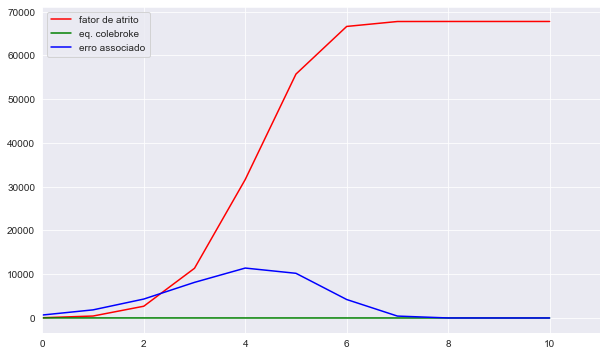

In [143]:
plt.style.use('seaborn-bright')
fig = plt.figure(figsize=(10, 6))
m1 = data_df['x estimado']
m2 = data_df['f estimado']
m3 = data_df['erro associado']
x = np.array(range(len(m1)))

plt.plot(x, m1, 'r')
plt.plot(x, m2, 'g')
plt.plot(x, m3, 'b')
plt.legend(["fator de atrito","eq. colebroke", "erro associado"])
plt.axis([0,len(m1),max(m1),min(m1)])
plt.xlabel('Iterações')
plt.ylabel('Aproximações')
plt.title('Método de Newton Raphson')
plt.grid(True)
plt.show()

C:\Users\alana\anaconda3\envs\mathplots\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


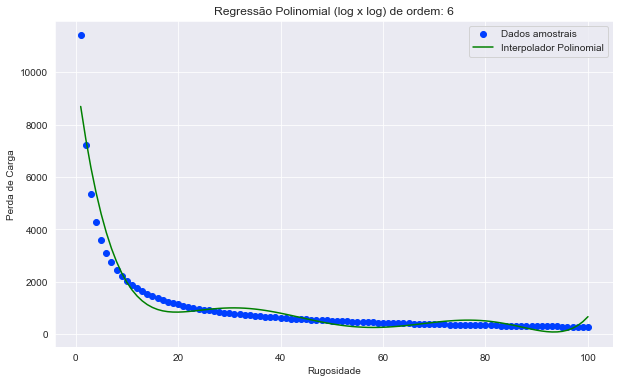

In [149]:
rugosidade = lambda f: - 2 * np.log10((E / (D * 3.7) + (2.51 * f / re)))
list_rugosidade = []

for x in np.linspace(start, end, spaces):
    list_rugosidade.append(rugosidade(x))

x_interval = np.log(np.linspace(start, end, spaces))
xdic = {'X':np.exp(x_interval)}
ydic = {'Y':np.exp(list_rugosidade)}

X = pd.DataFrame.from_dict(xdic)
Y = pd.DataFrame.from_dict(ydic)

x_SEQ = np.linspace(X.min(),X.max(),spaces).reshape(-1,1)

value =6 # grau do polinômio

polynomial_regression = make_pipeline(PolynomialFeatures(value),LinearRegression())
polynomial_regression.fit(X,Y)

plt.figure(figsize=(10, 6))
plt.scatter(X,Y)
plt.plot(x_SEQ, polynomial_regression.predict(x_SEQ),color='g')
plt.title('Regressão Polinomial (log x log) de ordem: '+str(value))
plt.grid(True)
plt.legend(["Dados amostrais","Interpolador Polinomial"])
plt.xlabel("Rugosidade")
plt.ylabel("Perda de Carga")
plt.show()


In [151]:
X = sm.add_constant(X)
resultados = sm.OLS(Y, X).fit()
resultados.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     52.63
Date:                Wed, 22 Jun 2022   Prob (F-statistic):           9.52e-11
Time:                        20:18:36   Log-Likelihood:                -850.78
No. Observations:                 100   AIC:                             1706.
Df Residuals:                      98   BIC:                             1711.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2535.9768    243.971     10.395      0.000    2051.825    3020.129
X            -30.4275      4.194     -7.255      0.000     -38.751     -22.104
==============================================================================
Omnibus:                      137.355   Durbin-Watson:                   0.157
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4185.491
Skew:                           4.829   Prob(JB):                         0.00
Kurtosis:                      33.187   Cond. No.                         117.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [154]:
resultados.params

const    2535.976848
X         -30.427457
dtype: float64

In [152]:
resultados.tvalues

const    10.394591
X        -7.254556
dtype: float64

In [153]:
resultados.t_test([1, 0])

<class 'statsmodels.stats.contrast.ContrastResults'>
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0          2535.9768    243.971     10.395      0.000    2051.825    3020.129

In [155]:
resultados.f_test(np.identity(2))

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=60.38297240639868, p=8.148386108925494e-18, df_denom=98, df_num=2>